In [28]:
%matplotlib notebook
import sympy as sp
import numpy as np
sp.init_printing()
import matplotlib.pyplot as plt
import ipywidgets as ipw

## Problem
This sheet is regarded as an example to evaluate damage function and its values using the BMCS course as a reference. The trilinear stress-opening law is given as:
\begin{gather*}
\sigma = E w; \: \mathrm{for}\; 0 \leq w \leq w_0
\end{gather*}
\begin{gather*}
\sigma = f_\mathrm{t} - (f_\mathrm{t} - \sigma_s(w_1)) \frac{w}{w_1} ; \: \mathrm{for}\; w_0 \leq w \leq w_1
\end{gather*}
\begin{gather*}
\sigma = \sigma_s \frac{w_2 - w}{w_2 - w_1} ; \: \mathrm{for}\; w_1 \leq w \leq w_2
\end{gather*}

<img src="stressopeningrelation.png" width="500"/> 

- Derive a damage function which will reproduce the given stress opening relation
- Calculate damage and stiffness values at opening $w_{1}$ for the given values:
$w_0 = 0.1 \mathrm{mm}$, $w_1 = 0.2 \mathrm{mm}$, $w_2 = 1 \mathrm{mm}$, $\sigma_s = 5 \mathrm{MPa}$, and $\mathrm{E} = 100 \mathrm{MPa/mm}$
- Sketch graphically the derived damage function in a damage opening diagram

## Solution


From BMCS we know that:
\begin{gather*}
\sigma = (1 - \omega)E w
\end{gather*}

In [29]:
omega = sp.Symbol(r'\omega', nonnegative = True)
E = sp.Symbol(r'E', nonnegative = True)
w = sp.Symbol(r'w', real = True)
w_0 = sp.Symbol(r'w_0', nonnegative = True)
sigma = sp.Symbol(r'\sigma', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
w_1 = sp.Symbol('w_1', nonnegative = True)
w_2 = sp.Symbol('w_2', nonnegative = True)
pi = sp.Symbol('\pi', nonnegative = True)

In [30]:
sigma_ = (1 - omega) * E * w
sigma_

### Part 1
- Deriving damage function for each case depicted in the figure above:

In [31]:
params = {w_0 : 0.1, w_1 : 0.2, w_2 : 1, sigma_s : 5, E: 100, f_t: 10}

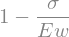

In [32]:
omega_val = sp.solve(sp.Eq(sigma, sigma_), omega)
omega_val[0]

In [33]:
sigma_1 = E * w
omega_val_1 = omega_val[0].subs(sigma, sigma_1)
omega_val_1

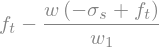

In [34]:
sigma_2 = f_t - (f_t - sigma_s) * (w / w_1) 
sigma_2

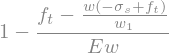

In [35]:
omega_val_2 = omega_val[0].subs(sigma, sigma_2)
omega_val_2

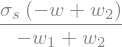

In [36]:
sigma_3 = sigma_s * (w_2 - w) / (w_2 - w_1)
sigma_3

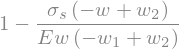

In [37]:
omega_val_3 = omega_val[0].subs(sigma, sigma_3)
omega_val_3

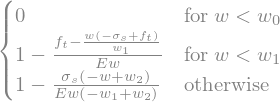

In [38]:
omega_val = sp.Piecewise(
    (omega_val_1, w < w_0),
    (omega_val_2, w < w_1),
    (omega_val_3, True)
)
omega_val

In [39]:
get_omega = sp.lambdify((w, E,w_0,w_1, w_2, f_t, sigma_s), omega_val, 'numpy')

<IPython.core.display.Javascript object>


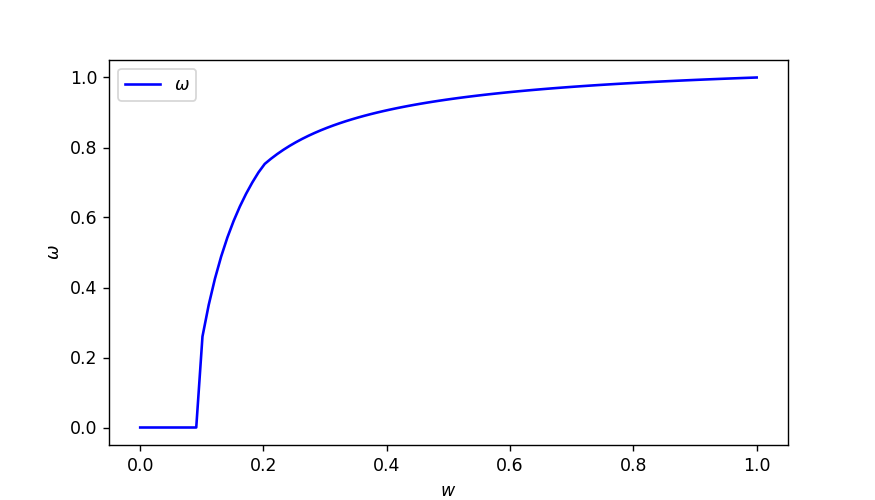

<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [40]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
w_range = np.linspace(0, 1, 100)
omega_rec = get_omega(w_range,100,0.1,0.2,1,10,5 ) 
ax1.plot(w_range, omega_rec, color='b', label = '$\omega$')
ax1.set_xlabel('$w$'); ax1.set_ylabel('$\omega$')
ax1.legend()

## Calculating local cohesive breaking energy
\begin{gather*}
w_x = CMOD_c\left[\left(1 - \frac{x}{a_c}\right)^2 + \left(1.081 - 1.149 \left(\frac{a_c}{D}\right)\right)\left[\frac{x}{a_c} - \left(\frac{a_0}{a_c}\right)^2\right]\right]^{1/2} 
\end{gather*}
\begin{gather*}
a_i = \frac{2}{\pi}(D + H_0) \arctan{\sqrt{\frac{B E C_{si}}{32.6} - 0.1135}} - H_0
\end{gather*}

In [46]:
w_x = sp.Symbol('w_x', nonnegative = True)
f_c = sp.Symbol('f_c', nonnegative = True)
sigma_s = sp.Symbol(r'\sigma_s', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
f_t = sp.Symbol('f_t', nonnegative = True)
CMOD_c = sp.Symbol('CMOD_c', nonnegative = True)

In [47]:
params = {P_max : 10, 
          D : 2, 
          H_0 : 1, 
          B : 1.5, 
          E : 1000, 
          a_0 : 0.1, 
          CMOD_c : 0.15,
          sigma_s : 5,
          f_t : 10,
          pi : 3.14,
          w_0 : 0.1,
          w_1 : 0.2,
          w_2 : 1
         }

In [48]:
C_si = CMOD_c / P_max
a_i = (2/pi) * (D + H_0) * sp.atan(sp.sqrt((B*E*C_si)/(32.6)-0.1135)) - H_0
a_c_ = a_i.subs(params)
a_c_

\begin{gather*}
g_f(x) =\int_{0}^{w_x} \sigma(w)dw
\end{gather*}

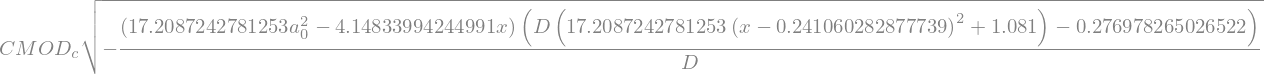

In [49]:
a_c  = sp.Symbol('a_c', nonnegative = True)
x = sp.Symbol('x', nonnegative = True)
w_x = CMOD_c * sp.sqrt(((1 - x/a_c)**2 + (1.081 - 1.149*(a_c/D)))*(x/a_c - (a_0/a_c)**2))
w_x_ = w_x.subs(a_c,a_c_)
wx_ = sp.simplify(w_x_)
wx_

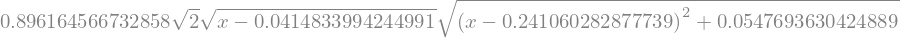

In [50]:
get_w_x = sp.lambdify((x), wx_.subs(params), 'numpy')
wx_.subs(params)

<IPython.core.display.Javascript object>


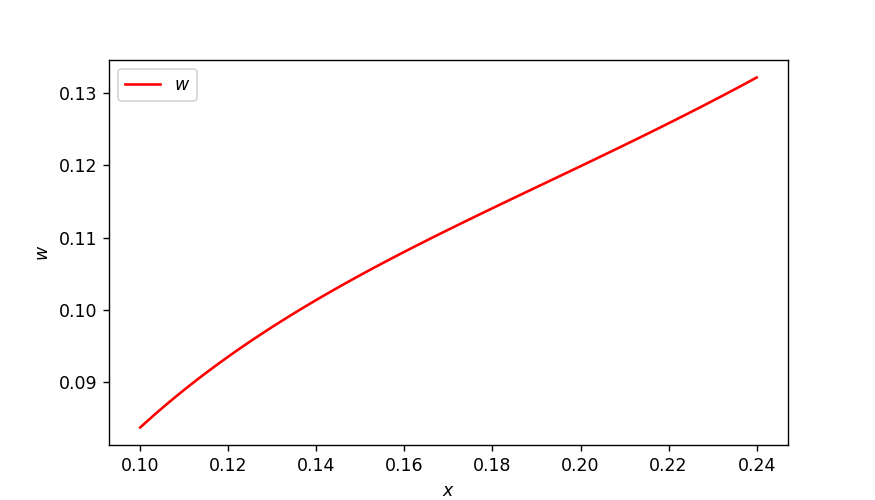

In [51]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.24, 100)
w_x_rec = get_w_x(x_range) 
ax1.plot(x_range, w_x_rec, color='r', label = '$w$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$w$')
ax1.legend()

In [52]:
sigma_1 = E * wx_
sigma_2 = f_t - (f_t - sigma_s) * (wx_ / w_1) 
sigma_3 = sigma_s * (w_2 - wx_) / (w_2 - w_1)

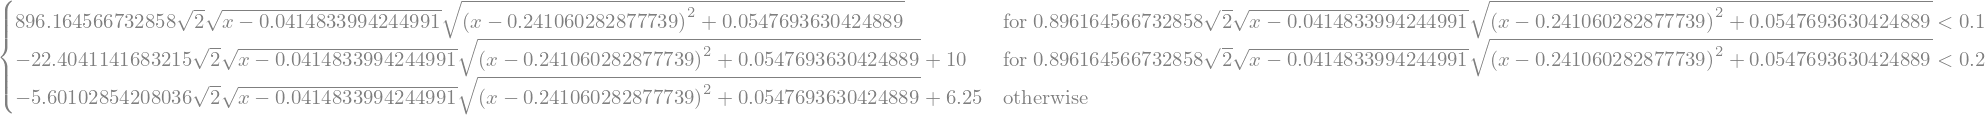

In [53]:
sigma = sp.Piecewise(
    (sigma_1.subs(params), wx_.subs(params)< w_0.subs(params)),
    (sigma_2.subs(params), wx_.subs(params)< w_1.subs(params)),
    (sigma_3.subs(params), True)
)
sigma 

In [54]:
get_sigma = sp.lambdify((x), sigma, 'numpy')

<img src="cracktipzoom.png" width="600"/> 

<IPython.core.display.Javascript object>


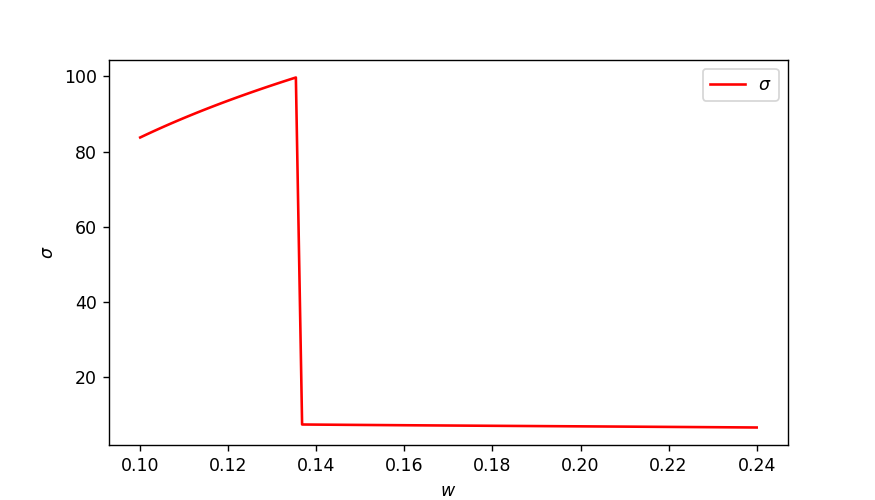

In [55]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.24, 100)
sigma_rec = get_sigma(x_range) 
ax1.plot(x_range, sigma_rec, color='r', label = '$\sigma$')
ax1.set_xlabel('$w$'); ax1.set_ylabel('$\sigma$')
ax1.legend()

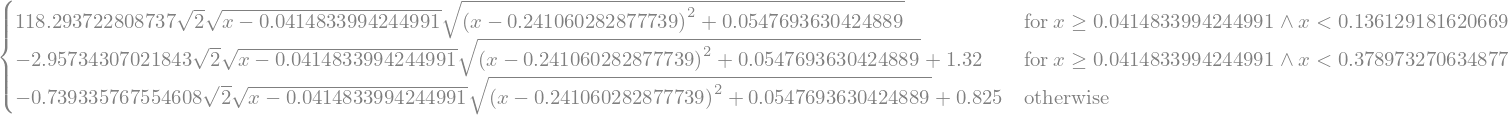

In [56]:
g = sp.integrate(sigma, (w, 0, 0.132))
g

In [57]:
get_g = sp.lambdify((x), g.subs(params), 'numpy')
get_g

<function _lambdifygenerated(x)>

<img src="gfdistribution.png" width="600"/> 

<IPython.core.display.Javascript object>


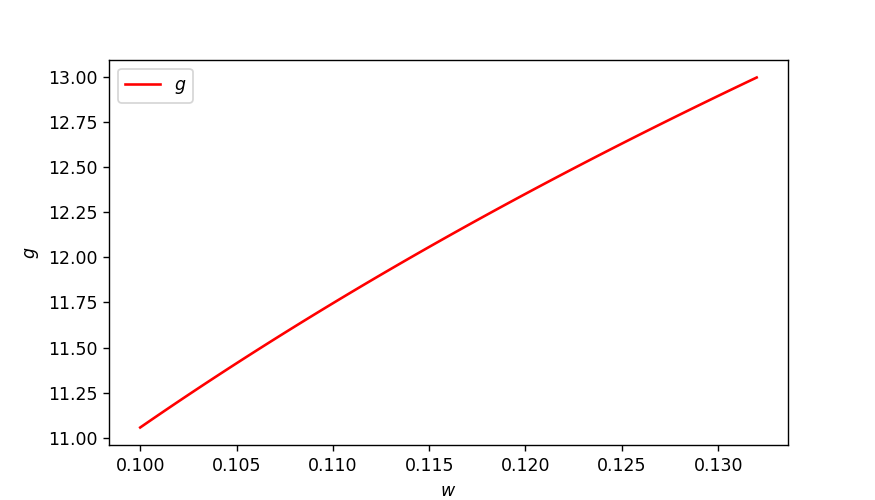

In [60]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.132, 100)
g_rec = get_g(x_range) 
ax1.plot(x_range, g_rec, color='r', label = '$g$')
ax1.set_xlabel('$w$'); ax1.set_ylabel('$g$')
ax1.legend()

### Determining Cohesive Breaking Energy
$G_{I-cohesive}$ is defined as the average energy dissipation per unit length due to bridging cohesive action:
\begin{gather*}
G_{I-cohesive} = \frac{1}{a - a_0} \int_{a_0}^{a} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 
especially when crack length $a$ reaches critical effective crack propagation length $a_c$, $G_{I-cohesive}$ becomes critical cohesive crack breaking energy $G^c_{Ic}$ and is given as:
\begin{gather*}
G_{Ic} = \frac{1}{a_c - a_0} \int_{a_0}^{a_c} \int_{0}^{w} \sigma(w_x) dw dx
\end{gather*} 

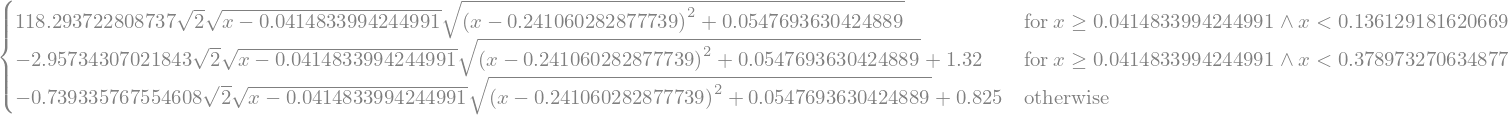

In [92]:
G_I_c = 1/(0.24 - 0.1) * sp.integrate(g, (a, 0.1, 0.24))
G_Ic = sp.simplify(G_I_c)
G_Ic

In [93]:
get_G_I_c = sp.lambdify((x), G_Ic, 'numpy')
get_G_I_c

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


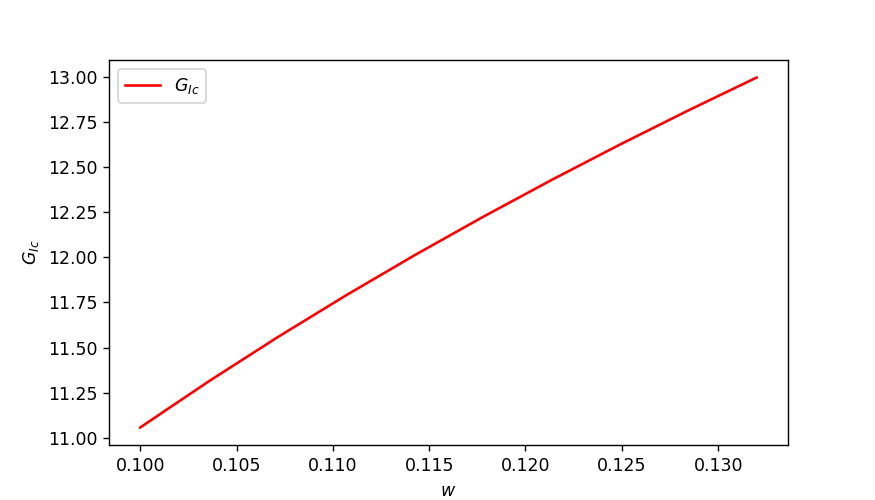

In [94]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.132, 10)
G_I_c_ = get_G_I_c(x_range) 
ax1.plot(x_range, G_I_c_, color='r', label = '$G_{Ic}$')
ax1.set_xlabel('$w$'); ax1.set_ylabel('$G_{Ic}$')
ax1.legend()

### Unstable Fracture Energy
The unstable fracture energy can be obtained as:
\begin{gather*}
G^{un}_{Ic} = \frac{3 P^2_{max}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
\begin{gather*}
V(\alpha) = \left( \frac{\alpha}{1 - \alpha} \right)^2 [5.58 - 19.57 \alpha + 36.82 \alpha^2 - 34.94 \alpha^3 + 12.77 \alpha^4]
\end{gather*}
\begin{gather*}
\alpha = \frac{(a + H_0)}{(D + H_0)}
\end{gather*}

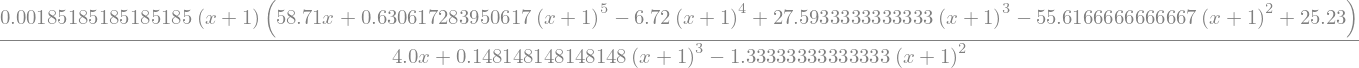

In [116]:
alpha = sp.Symbol(r'\alpha', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
V_alpha = (alpha / (1 - alpha))**2 * (5.58 - 19.57* alpha + 36.82 * alpha**2 - 34.94 * alpha**3 + 12.77 * alpha**4)
G_un = sp.simplify((3*P_max**2)/(4*B**2*D**3*E) * V_alpha.diff(alpha))
alpha_ = (a + H_0) / (D + H_0)
alpha_
G_un_f = G_un.subs(alpha,alpha_).subs(params).subs(a,x)
G_un_f

In [117]:
get_G_un = sp.lambdify((x), G_un_f, 'numpy')
get_G_un

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


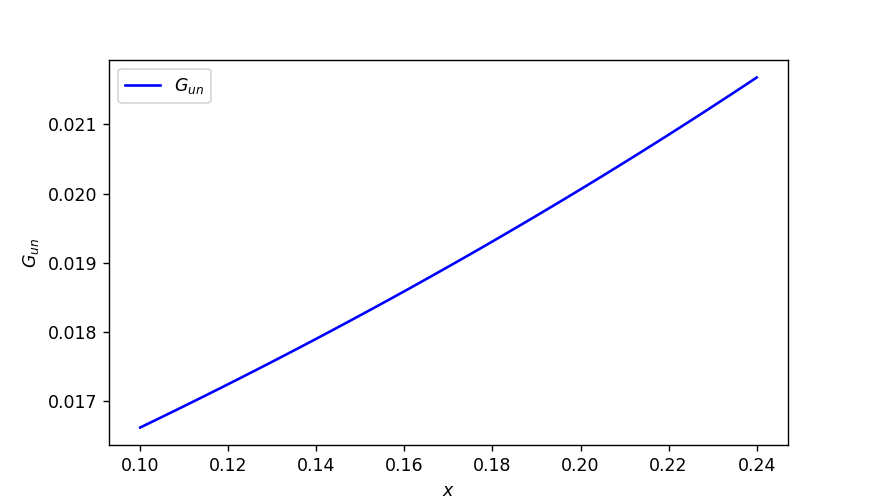

In [102]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.24, 100)
G_un_ = get_G_un(x_range) 
ax1.plot(x_range, G_un_, color='b', label = '$G_{un}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{un}$')
ax1.legend()

### Initial Fracture Energy
\begin{gather*}
G^{ini}_{Ic} = \frac{3 P^2_{ini}}{4 B^2 D^3 E} V'(\alpha)
\end{gather*}
or, 
\begin{gather*}
G^{ini}_{Ic} = G^{un}_{Ic}  - G^{c}_{Ic}
\end{gather*}

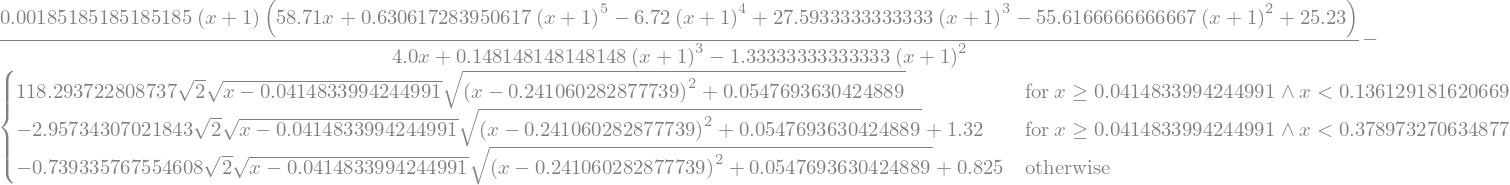

In [118]:
G_ini = G_un_f - G_Ic
G_ini

In [119]:
get_G_ini = sp.lambdify((x), G_ini, 'numpy')
get_G_ini

<function _lambdifygenerated(x)>

<IPython.core.display.Javascript object>


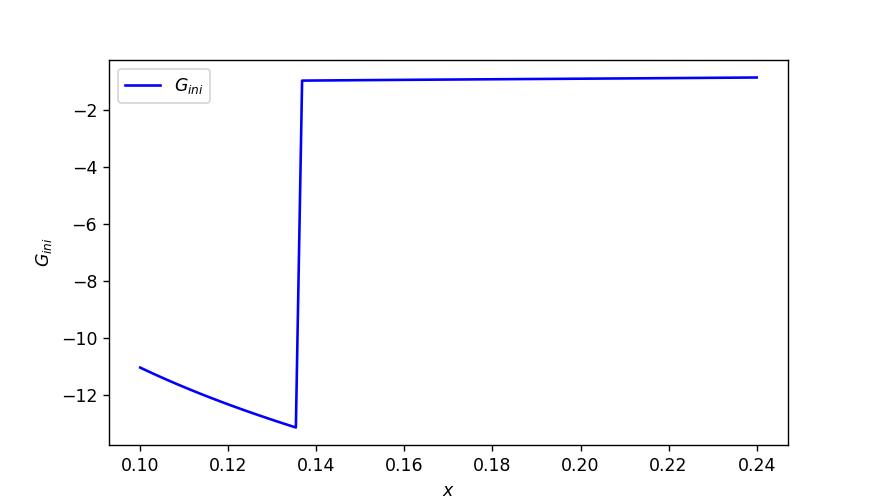

In [120]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.24, 100)
G_ini_ = get_G_ini(x_range) 
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G_{ini}$')
ax1.legend()

<IPython.core.display.Javascript object>


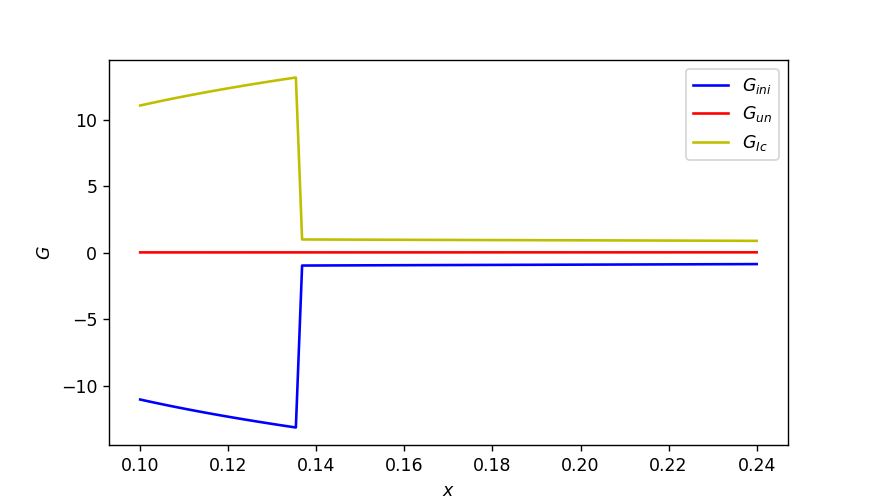

In [123]:
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
x_range = np.linspace(0.1, 0.24, 100)
G_ini_ = get_G_ini(x_range) 
G_un_ = get_G_un(x_range)
G_I_c_ = get_G_I_c(x_range)  
ax1.plot(x_range, G_ini_, color='b', label = '$G_{ini}$')
ax1.plot(x_range, G_un_, color='r', label = '$G_{un}$')
ax1.plot(x_range, G_I_c_, color='y', label = '$G_{Ic}$')
ax1.set_xlabel('$x$'); ax1.set_ylabel('$G$')
ax1.legend()